In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv("/Users/hjk2160@columbia.edu/Desktop/dataset.csv")

In [3]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
from collections import Counter #항목들 계산해주는 라이브러리
import re #정규표현식임. 쉽게 말해, 내 키워드같은거 어떤 corpus에서 찾을수 있는지 찾아주는거임.

keywords = ['data', 'machine learning', 'analysis', 'statistics', 'research', 'python']
def count_keywords(description, keywords):
    description = description.lower()
    keyword_counts = {keyword: len(re.findall(r'\b{}\b'.format(re.escape(keyword)), description)) for keyword in keywords}
    return keyword_counts

In [6]:
max_keyword_occurrence = 0

In [7]:
for description in df['Job Description']:
    keyword_counts = count_keywords(description, keywords)
    max_keyword_occurrence = max(max_keyword_occurrence, max(keyword_counts.values()))

In [8]:
def calculate_score(keyword_counts, max_score):
    total_count = sum(keyword_counts.values())
    normalized_score = 0.1 + 0.9 * (total_count / max_score) if max_score > 0 else 0.1
    return normalized_score

df['Keyword_Counts'] = df['Job Description'].apply(lambda desc: count_keywords(desc, keywords))
df['Keyword_Score'] = df['Keyword_Counts'].apply(lambda counts: calculate_score(counts, max_keyword_occurrence))

In [9]:
df.drop('Job Description', axis=1, inplace=True)

In [10]:
df.drop('index',axis=1, inplace=True)

In [11]:
# need to convert salary estimate into scores as well 

def salary_to_score(salary_string):
    salary_string = re.sub(r'(\(Glassdoor est.\))|K|\$', '', salary_string).strip()
    numbers = re.findall(r'\d+', salary_string)
    
    if len(numbers) == 2:
        lower_bound = int(numbers[0]) * 1000
        upper_bound = int(numbers[1]) * 1000
    
        score = (lower_bound + upper_bound) / 2
    else:
        score = None
    return score

In [12]:
df['Salary_Score'] = df['Salary Estimate'].apply(salary_to_score)
df = df.dropna(subset=['Salary_Score'])
max_salary_score = df['Salary_Score'].max()
min_salary_score = df['Salary_Score'].min()
df['Salary_Estimate_Score'] = df['Salary_Score'].apply(lambda x: 0.1 + 0.9 * ((x - min_salary_score) / (max_salary_score - min_salary_score)))

In [13]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Keyword_Counts,Keyword_Score,Salary_Score,Salary_Estimate_Score
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,"{'data': 13, 'machine learning': 3, 'analysis'...",0.480769,146000.0,0.656522
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"{'data': 7, 'machine learning': 1, 'analysis':...",0.342308,146000.0,0.656522
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"{'data': 11, 'machine learning': 2, 'analysis'...",0.446154,146000.0,0.656522
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"{'data': 26, 'machine learning': 0, 'analysis'...",0.636538,146000.0,0.656522
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522


In [14]:
#Im going to erase all above entry level jobs
keywords = ['senior', 'analyst', 'director', 'manager', 'sr','lead', 'principal']

def contains_keyword(title, keywords):
    title_lower = title.lower()
    return any(keyword in title_lower for keyword in keywords)

mask = df['Job Title'].apply(contains_keyword, keywords=keywords)
df = df[~mask]

In [15]:
df.head(10)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Keyword_Counts,Keyword_Score,Salary_Score,Salary_Estimate_Score
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"{'data': 7, 'machine learning': 1, 'analysis':...",0.342308,146000.0,0.656522
5,Data Scientist,$111K-$181K (Glassdoor est.),2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1,"{'data': 8, 'machine learning': 1, 'analysis':...",0.307692,146000.0,0.656522
6,Quantitative Researcher,$111K-$181K (Glassdoor est.),4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,"{'data': 1, 'machine learning': 0, 'analysis':...",0.325000,146000.0,0.656522
7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"{'data': 1, 'machine learning': 0, 'analysis':...",0.151923,146000.0,0.656522
8,AI Scientist,$111K-$181K (Glassdoor est.),5.0,Paige\n5.0,"New York, NY","New York, NY",1 to 50 employees,2018,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True,"{'data': 1, 'machine learning': 1, 'analysis':...",0.186538,146000.0,0.656522
9,Quantitative Researcher,$111K-$181K (Glassdoor est.),4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,"{'data': 0, 'machine learning': 0, 'analysis':...",0.117308,146000.0,0.656522
10,Data Scientist,$111K-$181K (Glassdoor est.),3.9,Quartet Health\n3.9,"New York, NY","New York, NY",201 to 500 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True,"{'data': 8, 'machine learning': 4, 'analysis':...",0.411538,146000.0,0.656522
11,Data Scientist/Machine Learning,$111K-$181K (Glassdoor est.),4.4,PulsePoint\n4.4,"New York, NY","New York, NY",51 to 200 employees,2011,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Crossix Solutions Inc., AppNexus, The Trade Desk",-1,"{'data': 5, 'machine learning': 4, 'analysis':...",0.325000,146000.0,0.656522
12,"Data Scientist, Acorn AI Labs",$111K-$181K (Glassdoor est.),4.3,Medidata Solutions\n4.3,"New York, NY","New York, NY",1001 to 5000 employees,1999,Company - Public,Enterprise Software & Network Solutions,Information Technology,$500 million to $1 billion (USD),Oracle,-1,"{'data': 10, 'machine learning': 3, 'analysis'...",0.411538,146000.0,0.656522
13,Data Scientist,$111K-$181K (Glassdoor est.),3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,"{'data': 14, 'machine learning': 2, 'analysis'...",0.480769,146000.0,0.656522


In [16]:
df.drop('Founded', axis = 1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 1 to 3908
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              2149 non-null   object 
 1   Salary Estimate        2149 non-null   object 
 2   Rating                 2149 non-null   float64
 3   Company Name           2149 non-null   object 
 4   Location               2149 non-null   object 
 5   Headquarters           2149 non-null   object 
 6   Size                   2149 non-null   object 
 7   Type of ownership      2149 non-null   object 
 8   Industry               2149 non-null   object 
 9   Sector                 2149 non-null   object 
 10  Revenue                2149 non-null   object 
 11  Competitors            2149 non-null   object 
 12  Easy Apply             2149 non-null   object 
 13  Keyword_Counts         2149 non-null   object 
 14  Keyword_Score          2149 non-null   float64
 15  Sala

In [18]:
df.drop('Size', axis = 1, inplace=True)

In [19]:
df.drop('Easy Apply', axis=1, inplace=True)

In [20]:
df.describe()

,Rating,Keyword_Score,Salary_Score,Salary_Estimate_Score
count,2149.000000,2149.000000,2149.000000,2149.000000
mean,3.265891,0.331161,108511.167985,0.493527
std,1.628358,0.171478,37667.785608,0.163773
min,-1.000000,0.100000,18000.000000,0.100000
25%,3.200000,0.203846,77500.000000,0.358696
50%,3.700000,0.290385,105500.000000,0.480435
75%,4.100000,0.428846,133000.000000,0.600000
max,5.000000,1.138462,225000.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 1 to 3908
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              2149 non-null   object 
 1   Salary Estimate        2149 non-null   object 
 2   Rating                 2149 non-null   float64
 3   Company Name           2149 non-null   object 
 4   Location               2149 non-null   object 
 5   Headquarters           2149 non-null   object 
 6   Type of ownership      2149 non-null   object 
 7   Industry               2149 non-null   object 
 8   Sector                 2149 non-null   object 
 9   Revenue                2149 non-null   object 
 10  Competitors            2149 non-null   object 
 11  Keyword_Counts         2149 non-null   object 
 12  Keyword_Score          2149 non-null   float64
 13  Salary_Score           2149 non-null   float64
 14  Salary_Estimate_Score  2149 non-null   float64
dtypes: f

# EDA 파트 1

In [22]:
#본격적인 EDA
numerical_vars = ['Keyword_Score', 'Salary_Score', 'Salary_Estimate_Score', 'Rating']
df[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Keyword_Score,2149.0,0.331161,0.171478,0.1,0.203846,0.290385,0.428846,1.138462
Salary_Score,2149.0,108511.167985,37667.785608,18000.0,77500.000000,105500.000000,133000.000000,225000.000000
Salary_Estimate_Score,2149.0,0.493527,0.163773,0.1,0.358696,0.480435,0.600000,1.000000
Rating,2149.0,3.265891,1.628358,-1.0,3.200000,3.700000,4.100000,5.000000


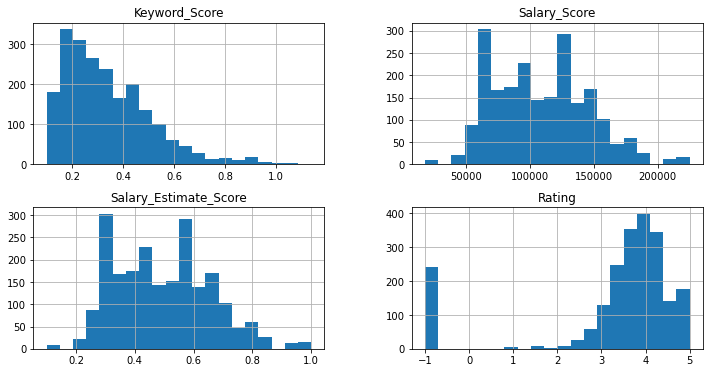

In [23]:
df[numerical_vars].hist(bins=20, figsize=(12,6))
plt.show()

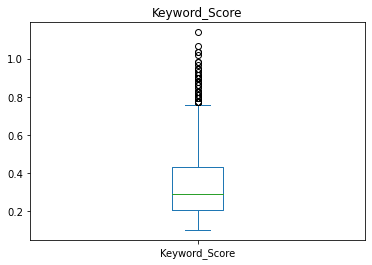

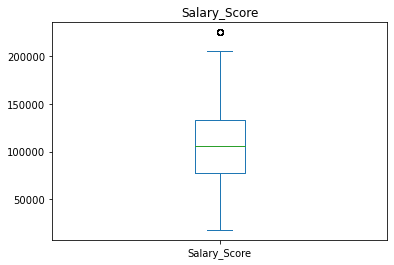

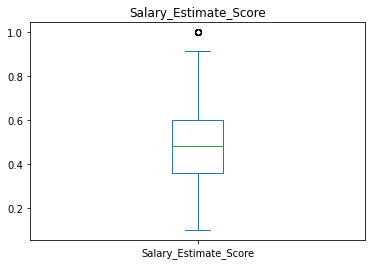

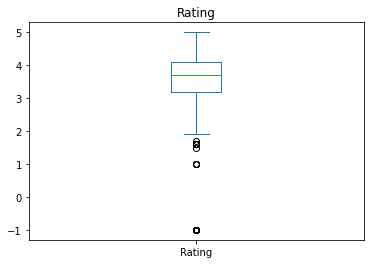

In [24]:
for var in numerical_vars:
    df[var].plot(kind='box')
    plt.title(var)
    plt.show()

In [25]:
df['Job Title'].value_counts()

Data Scientist                                                         274
Data Engineer                                                          260
Machine Learning Engineer                                               47
Big Data Engineer                                                       41
Research Scientist                                                      22
                                                                      ... 
Scottsdale Data Science Tutor Jobs                                       1
Mesa Data Science Tutor Jobs                                             1
Cloud Data Engineer - Solution Specialist - USDC                         1
Chandler Data Science Tutor Jobs                                         1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: Job Title, Length: 1145, dtype: int64

In [26]:
value_counts = df['Job Title'].value_counts()
mask = df['Job Title'].isin(value_counts[value_counts >= 20].index)
df = df[mask]

In [27]:
df['Job Title'].value_counts()

Data Scientist               274
Data Engineer                260
Machine Learning Engineer     47
Big Data Engineer             41
Research Scientist            22
Name: Job Title, dtype: int64

In [28]:
df['Industry'].value_counts()

-1                                         145
IT Services                                102
Staffing & Outsourcing                      49
Enterprise Software & Network Solutions     42
Consulting                                  40
                                          ... 
Food & Beverage Manufacturing                1
Consumer Product Rental                      1
Casual Restaurants                           1
Grantmaking Foundations                      1
Energy                                       1
Name: Industry, Length: 65, dtype: int64

In [29]:
df = df[df['Industry'] != '-1']

In [30]:
value_counts = df['Industry'].value_counts()
mask = df['Industry'].isin(value_counts[value_counts >= 20].index)
df = df[mask]

In [31]:
df['Industry'].value_counts()

IT Services                                102
Staffing & Outsourcing                      49
Enterprise Software & Network Solutions     42
Consulting                                  40
Computer Hardware & Software                38
Internet                                    32
Advertising & Marketing                     24
Name: Industry, dtype: int64

In [32]:
def categorize_industry(industry):
    if industry == 'Consulting':
        return 'Consulting Industry'
    elif industry in ['IT Services', 'Computer Hardware & Software', 'Internet', 'Enterprise Software & Network Solutions','Advertising & Marketing']:
        return 'Tech Industry'
    else:
        return 'Other Industry'

In [33]:
df['categorized_industry'] = df['Industry'].apply(categorize_industry)

In [34]:
df.drop('Competitors', axis=1, inplace=True)

In [35]:
df.drop('Sector', axis=1, inplace=True)

In [36]:
df.drop('Revenue', axis=1, inplace=True)

In [37]:
df.drop('Location', axis=1, inplace=True)

In [38]:
df.drop('Headquarters', axis=1, inplace=True)

In [39]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Type of ownership,Industry,Keyword_Counts,Keyword_Score,Salary_Score,Salary_Estimate_Score,categorized_industry
10,Data Scientist,$111K-$181K (Glassdoor est.),3.9,Quartet Health\n3.9,Company - Private,Enterprise Software & Network Solutions,"{'data': 8, 'machine learning': 4, 'analysis':...",0.411538,146000.0,0.656522,Tech Industry
15,Data Scientist,$111K-$181K (Glassdoor est.),3.0,Affinity Solutions\n3.0,Company - Private,Advertising & Marketing,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
24,Data Scientist,$111K-$181K (Glassdoor est.),4.4,WITHIN\n4.4,Company - Private,Advertising & Marketing,"{'data': 6, 'machine learning': 1, 'analysis':...",0.238462,146000.0,0.656522,Tech Industry
26,Data Scientist,$111K-$181K (Glassdoor est.),4.1,Datadog\n4.1,Company - Public,Computer Hardware & Software,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
30,Data Scientist,$120K-$140K (Glassdoor est.),4.3,Caserta\n4.3,Company - Private,IT Services,"{'data': 10, 'machine learning': 1, 'analysis'...",0.359615,130000.0,0.586957,Tech Industry


In [40]:
df.drop("Type of ownership", axis=1, inplace=True)

In [41]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Industry,Keyword_Counts,Keyword_Score,Salary_Score,Salary_Estimate_Score,categorized_industry
10,Data Scientist,$111K-$181K (Glassdoor est.),3.9,Quartet Health\n3.9,Enterprise Software & Network Solutions,"{'data': 8, 'machine learning': 4, 'analysis':...",0.411538,146000.0,0.656522,Tech Industry
15,Data Scientist,$111K-$181K (Glassdoor est.),3.0,Affinity Solutions\n3.0,Advertising & Marketing,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
24,Data Scientist,$111K-$181K (Glassdoor est.),4.4,WITHIN\n4.4,Advertising & Marketing,"{'data': 6, 'machine learning': 1, 'analysis':...",0.238462,146000.0,0.656522,Tech Industry
26,Data Scientist,$111K-$181K (Glassdoor est.),4.1,Datadog\n4.1,Computer Hardware & Software,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
30,Data Scientist,$120K-$140K (Glassdoor est.),4.3,Caserta\n4.3,IT Services,"{'data': 10, 'machine learning': 1, 'analysis'...",0.359615,130000.0,0.586957,Tech Industry


In [42]:
df['Company Name'] = df['Company Name'].str.replace(r'[\W\d_]+$', '', regex=True)

In [43]:
df.drop('Salary Estimate', axis=1, inplace=True)
df.drop('Industry', axis=1, inplace=True)

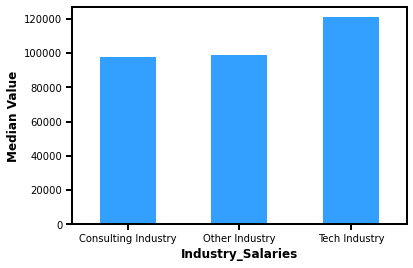

In [44]:
custom_colors = ['#339FFF']

grouped = df.groupby('categorized_industry').agg({'Salary_Score': 'median'})

fig, ax = plt.subplots()


grouped.plot(kind='bar', ax=ax, color=custom_colors, legend=False)


ax.set_xlabel('Industry_Salaries', fontsize=12, fontweight='bold')
ax.set_ylabel('Median Value', fontsize=12, fontweight='bold')


ax.tick_params(axis='both', which='both', labelsize=10, width=2, length=6)
for spine in ax.spines.values():
    spine.set_linewidth(2)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.show()

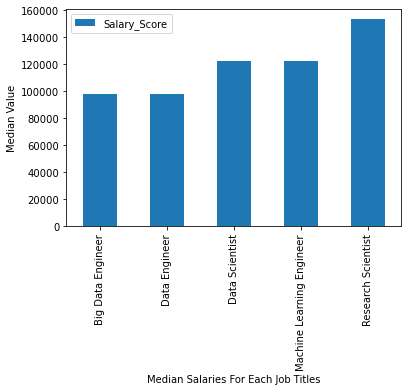

In [45]:
grouped = df.groupby('Job Title').agg({'Salary_Score': 'median'})
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax)
ax.set_xlabel('Median Salaries For Each Job Titles')
ax.set_ylabel('Median Value')
plt.show()

In [46]:
df.corr()

,Rating,Keyword_Score,Salary_Score,Salary_Estimate_Score
Rating,1.000000,0.077334,0.041348,0.041348
Keyword_Score,0.077334,1.000000,-0.016377,-0.016377
Salary_Score,0.041348,-0.016377,1.000000,1.000000
Salary_Estimate_Score,0.041348,-0.016377,1.000000,1.000000


In [47]:
df.head()

,Job Title,Rating,Company Name,Keyword_Counts,Keyword_Score,Salary_Score,Salary_Estimate_Score,categorized_industry
10,Data Scientist,3.9,Quartet Health,"{'data': 8, 'machine learning': 4, 'analysis':...",0.411538,146000.0,0.656522,Tech Industry
15,Data Scientist,3.0,Affinity Solutions,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
24,Data Scientist,4.4,WITHIN,"{'data': 6, 'machine learning': 1, 'analysis':...",0.238462,146000.0,0.656522,Tech Industry
26,Data Scientist,4.1,Datadog,"{'data': 8, 'machine learning': 2, 'analysis':...",0.342308,146000.0,0.656522,Tech Industry
30,Data Scientist,4.3,Caserta,"{'data': 10, 'machine learning': 1, 'analysis'...",0.359615,130000.0,0.586957,Tech Industry


In [54]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Keyword_Counts',
       'Keyword_Score', 'Salary_Score', 'Salary_Estimate_Score',
       'categorized_industry'],
      dtype='object')

# 두번째 EDA 시작

In [48]:
df.describe()

,Rating,Keyword_Score,Salary_Score,Salary_Estimate_Score
count,327.000000,327.000000,327.000000,327.000000
mean,3.727217,0.364167,110550.458716,0.502393
std,1.096855,0.153006,33821.432809,0.147050
min,-1.000000,0.117308,43500.000000,0.210870
25%,3.400000,0.255769,83750.000000,0.385870
50%,3.900000,0.342308,109000.000000,0.495652
75%,4.300000,0.463462,132750.000000,0.598913
max,5.000000,0.982692,225000.000000,1.000000


Text(0, 0.5, 'categorized_industry')

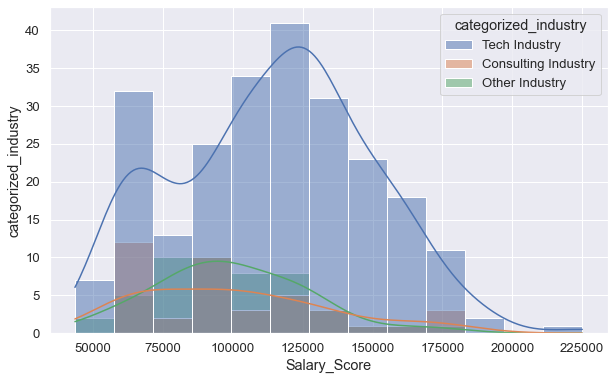

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "Salary_Score", kde = True, hue = "categorized_industry")
plt.xlabel('Salary_Score')
plt.ylabel('categorized_industry')

Text(0, 0.5, 'categorized_industry')

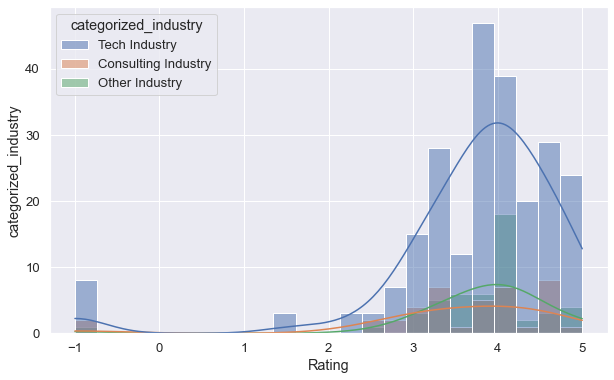

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "Rating", kde = True, hue = "categorized_industry")
plt.xlabel('Rating')
plt.ylabel('categorized_industry')

In [55]:
df.to_csv('updated_DS_jobs.csv', index=False)

## THEY ARE ALL ENTRY LEVEL DS JOBS!

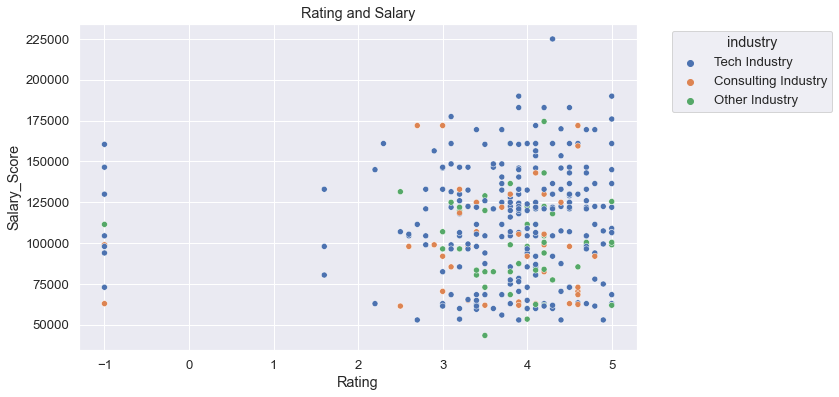

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Salary_Score', hue='categorized_industry')
plt.title('Rating and Salary')
plt.legend(title='industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()